In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
raw_data = pd.read_csv('data/clean_data.csv')

In [3]:
raw_data.head()

,Yr,Reporting_Entity_RIC_Name,Partner_Entity_RIC_Name,Flow,Reporting_Entity_Continent,Reporting_Entity_Type,Partner_Entity_Continent,Partner_Entity_Type
0,1792,France,Austria,13541271.0,Europe,Country,Europe,Country
1,1792,France,Germany,12300406.0,Europe,Country,Europe,Country
2,1792,France,Netherlands,21864951.0,Europe,Country,Europe,Country
3,1792,France,Portugal,1334107.0,Europe,Country,Europe,Country
4,1792,France,Prussia,2294328.0,Europe,Country,Europe,Country


### GTC_Functions

In [31]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

# data importing
raw_data = pd.read_csv('data/clean_data.csv')

class Graph_GT:
    def __init__(self, year, raw_data = raw_data):
        """
        Initialization
        self.df is a pd.dataframe for the given year
        """

        self.year = year
        self.df = raw_data.loc[raw_data['Yr']==year]
 

    def country_list(self):
        """
        raw_date should be a pd.dataframe
        
        """
        country_list = set(list(self.df.Reporting_Entity_RIC_Name)\
                           +list(self.df.Partner_Entity_RIC_Name))
        country_list = sorted(list(country_list))
        return country_list
    
    
    def graph(self):
        """
        creat a nx.graph object(weighted & directed)
        of the trading data for the given year
        """
        
        list_trade = self.df.iloc[:,[1,2,3]].values
#         list_trade_nanremoved = []
#         for row in list_trade:
#             if np.isnan(row[2]) == False:
#                 list_trade_nanremoved +=  [row]
        list_trade = np.array(list_trade)

        #min_max_scaler = preprocessing.MinMaxScaler()
        #
        #list_trade[:,2] = min_max_scaler.fit_transform(list_trade[:,2])       
        #list_trade[:,2] = preprocessing.scale(list_trade[:,2])

#         G = nx.DiGraph()
        G=nx.DiGraph()
        nodes = []
        for row in list_trade:
#             G.add_edge(row[0],row[1],row[2])
            G.add_edge(row[0],row[1],weight=row[2])
            nodes.append(row[0])
            nodes.append(row[1])
        nodes = set(nodes)
        G.add_nodes_from(nodes)
        return G

## Global Stats

In [32]:
def network_stats(year):
    G = Graph_GT(year = year).graph()
    node_size=len(set(G.nodes()))
    edge_size=len(set(G.edges()))
    #density
    density = nx.density(G)
    #connectivity
    connectivity=nx.average_node_connectivity(G)

    ##cluster_coefficient
    average_clustering=nx.average_clustering(G)
    
    network_stats={
        "node_size":len(set(G.nodes())),
        "edge_size":len(set(G.edges())),
        "density":nx.density(G),
        "connectivity":nx.average_node_connectivity(G),
        "average_clustering":nx.average_clustering(G)
    }
    return network_stats

In [33]:
network_stats(1840)

NetworkXError: ('Clustering algorithms are not defined ', 'for directed graphs.')

In [13]:
network_stats(1850)

{'average_clustering': 0.5182809435029615,
 'connectivity': 1.9585529126905,
 'density': 0.04728671129468737,
 'edge_size': 332,
 'node_size': 119}

In [14]:
network_stats(1860)

{'average_clustering': 0.5249496721099265,
 'connectivity': 1.8298962629671292,
 'density': 0.04161979752530934,
 'edge_size': 333,
 'node_size': 127}

In [15]:
network_stats(1870)

{'average_clustering': 0.4554707678884799,
 'connectivity': 2.1720452209660843,
 'density': 0.04511819116135663,
 'edge_size': 439,
 'node_size': 140}

In [16]:
network_stats(1880)

{'average_clustering': 0.5364058589581481,
 'connectivity': 2.959809183064997,
 'density': 0.0629695885509839,
 'edge_size': 528,
 'node_size': 130}

In [17]:
network_stats(1890)

{'average_clustering': 0.5622579679336661,
 'connectivity': 3.2128148556719984,
 'density': 0.06251149108291966,
 'edge_size': 680,
 'node_size': 148}

In [18]:
network_stats(1900)

{'average_clustering': 0.5997673771079266,
 'connectivity': 3.2171998624011007,
 'density': 0.0566219470244238,
 'edge_size': 823,
 'node_size': 171}

In [19]:
network_stats(1910)

{'average_clustering': 0.5694812916937729,
 'connectivity': 4.052784974093265,
 'density': 0.061474525043177894,
 'edge_size': 1139,
 'node_size': 193}

In [34]:
G_1840 = Graph_GT(year = 1840).graph()
G_1850 = Graph_GT(year = 1850).graph()
G_1860 = Graph_GT(year = 1860).graph()
G_1870 = Graph_GT(year = 1870).graph()
G_1880 = Graph_GT(year = 1880).graph()
G_1890 = Graph_GT(year = 1890).graph()
G_1900 = Graph_GT(year = 1900).graph()
G_1910 = Graph_GT(year = 1910).graph()

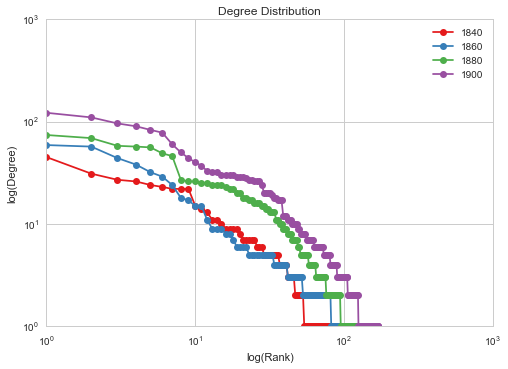

In [38]:
#!/usr/bin/env python
"""
Random graph from given degree sequence.
Draw degree rank plot and graph with matplotlib.
"""
__author__ = """Aric Hagberg <aric.hagberg@gmail.com>"""
import networkx as nx
import matplotlib.pyplot as plt
# G = nx.gnp_random_graph(100,0.02)
# plt.figure(figsize = [10,10])


def draw_degree(G,label):
    degree_sequence=sorted(nx.degree(G).values(),reverse=True) # degree sequence
    plt.loglog(degree_sequence,label =label,marker='o')

  
# plt.figure(figsize = [20,10])
# # with sns.color_palette("Set1", 10):
# ax = plt.subplot(221)
# draw_degree(G_1840,"1840")
# draw_degree(G_1850,"1850")
# draw_degree(G_1860,"1860")
# draw_degree(G_1870,"1870")
# ax.set_ylim([1,1000])
# plt.legend()
# plt.title("Degree Distribution")
# plt.ylabel("log(Degree)")
# plt.xlabel("log(Rank)")

# ax =plt.subplot(222)  
# draw_degree(G_1880,"1880")
# draw_degree(G_1890,"1890")
# draw_degree(G_1900,"1900")
# draw_degree(G_1910,"1910")
# ax.set_ylim([1,1000])

with sns.color_palette("Set1", 10):
    draw_degree(G_1840,"1840")
    draw_degree(G_1860,"1860")
    draw_degree(G_1880,"1880")
    draw_degree(G_1900,"1900")

plt.legend()
plt.title("Degree Distribution")
plt.ylabel("log(Degree)")
plt.xlabel("log(Rank)")



# # draw graph in inset
# plt.axes([0.45,0.45,0.45,0.45])
# Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
# pos=nx.spring_layout(Gcc)
# plt.axis('off')
# nx.draw_networkx_nodes(Gcc,pos,node_size=20,node_color=sns.xkcd_rgb["pale red"])
# nx.draw_networkx_edges(Gcc,pos,alpha=0.4)
# plt.savefig("degree_histogram.png")
plt.show()

## Local stats

### Centrality

In [39]:
##in-degree
indgree=nx.in_degree_centrality(G_1840)
sorted(indgree.items(), key=lambda x:x[1],reverse=True)

[('France', 0.2159090909090909),
 ('United States of America', 0.17045454545454547),
 ('Russia/USSR', 0.14772727272727273),
 ('Netherlands', 0.125),
 ('Portugal', 0.125),
 ('Two Sicilies', 0.125),
 ('Spain', 0.10227272727272728),
 ('Austria', 0.10227272727272728),
 ('Brazil', 0.10227272727272728),
 ('Denmark', 0.10227272727272728),
 ('United Kingdom', 0.10227272727272728),
 ('Belgium', 0.09090909090909091),
 ('Kingdom of Sardinia', 0.09090909090909091),
 ('Papal States', 0.07954545454545454),
 ('Tuscany', 0.07954545454545454),
 ('Egypt/United Arab Republic', 0.07954545454545454),
 ('Greece', 0.07954545454545454),
 ('Turkey', 0.06818181818181818),
 ('Italy', 0.06818181818181818),
 ('Germany', 0.05681818181818182),
 ('Viceroyalty of La Plata', 0.05681818181818182),
 ('Chile', 0.05681818181818182),
 ('Haiti', 0.05681818181818182),
 ('Prussia', 0.05681818181818182),
 ('Norway', 0.045454545454545456),
 ('Ionian Is.', 0.045454545454545456),
 ('Indonesia (Dutch East Indies)', 0.04545454545454

In [40]:
##out-degree
outdgree=nx.out_degree_centrality(G_1840)
sorted(outdgree.items(), key=lambda x:x[1],reverse=True)

[('France', 0.4318181818181818),
 ('United Kingdom', 0.4090909090909091),
 ('Belgium', 0.26136363636363635),
 ('Hamburg', 0.23863636363636365),
 ('Sweden', 0.2159090909090909),
 ('Kingdom of Sardinia', 0.18181818181818182),
 ('Netherlands', 0.17045454545454547),
 ('Tuscany', 0.17045454545454547),
 ('Trieste', 0.1590909090909091),
 ('Russia/USSR', 0.1590909090909091),
 ('Malta', 0.14772727272727273),
 ('Ionian Is.', 0.10227272727272728),
 ('Singapore', 0.09090909090909091),
 ('United States of America', 0.09090909090909091),
 ('Republic of St. Mark', 0.07954545454545454),
 ('Uruguay', 0.07954545454545454),
 ('Ancona', 0.06818181818181818),
 ('Morocco', 0.06818181818181818),
 ('Fiume', 0.05681818181818182),
 ('Sicily', 0.05681818181818182),
 ('Peru', 0.045454545454545456),
 ('Bremen', 0.03409090909090909),
 ('New South Wales', 0.03409090909090909),
 ('Spain', 0.011363636363636364),
 ('Finland', 0.011363636363636364),
 ('Riau', 0.0),
 ('Quebec (Lower Canada)', 0.0),
 ('Bolivia', 0.0),
 ('

In [41]:
##closeness
centr=nx.closeness_centrality(G_1840)
sorted(centr.items(), key=lambda x:x[1],reverse=True)

[('United Kingdom', 0.5509641873278237),
 ('France', 0.5232177894048398),
 ('Hamburg', 0.49813200498132),
 ('Belgium', 0.4632310364794441),
 ('Trieste', 0.44913745892661555),
 ('Netherlands', 0.44077134986225897),
 ('Tuscany', 0.44077134986225897),
 ('Kingdom of Sardinia', 0.44077134986225897),
 ('Morocco', 0.4228329809725158),
 ('Sweden', 0.4179728317659352),
 ('Uruguay', 0.4132231404958677),
 ('Malta', 0.4132231404958677),
 ('Sicily', 0.40520009881422925),
 ('Bremen', 0.4008431085043988),
 ('Ionian Is.', 0.3974167908594138),
 ('Singapore', 0.3787878787878788),
 ('Russia/USSR', 0.3748828491096532),
 ('Republic of St. Mark', 0.3567311874728143),
 ('Fiume', 0.3533498492029298),
 ('New South Wales', 0.3533498492029298),
 ('Peru', 0.3479773814702044),
 ('Ancona', 0.34264166326946593),
 ('Spain', 0.33361134278565474),
 ('United States of America', 0.3305785123966942),
 ('Finland', 0.26836632002683664),
 ('Riau', 0.0),
 ('Quebec (Lower Canada)', 0.0),
 ('Bolivia', 0.0),
 ('Cape Verde', 0.0)

In [42]:
btw=nx.betweenness_centrality(G_1840)
sorted(btw.items(), key=lambda x:x[1],reverse=True)

[('France', 0.10215848965848967),
 ('United Kingdom', 0.06228344611965301),
 ('Belgium', 0.038703330513675346),
 ('Russia/USSR', 0.03374239106997728),
 ('Tuscany', 0.021555456038214658),
 ('Netherlands', 0.018180159559469906),
 ('Singapore', 0.017863051699258597),
 ('Kingdom of Sardinia', 0.012819699457630491),
 ('Uruguay', 0.010637781758471415),
 ('United States of America', 0.010312588114312253),
 ('Sweden', 0.005958808113980528),
 ('Hamburg', 0.004342998955067921),
 ('Ionian Is.', 0.0024924947338740445),
 ('Morocco', 0.0020758695327660844),
 ('Malta', 0.0010805924599028047),
 ('Peru', 9.796238244514108e-05),
 ('Fiume', 0.0),
 ('Riau', 0.0),
 ('Bremen', 0.0),
 ('Quebec (Lower Canada)', 0.0),
 ('Ancona', 0.0),
 ('Bolivia', 0.0),
 ('Cape Verde', 0.0),
 ('Guatemala', 0.0),
 ('Germany (Zollverein)', 0.0),
 ('Germany', 0.0),
 ('Spain', 0.0),
 ('New Zealand', 0.0),
 ('Papal States', 0.0),
 ('India', 0.0),
 ('Turkey', 0.0),
 ('Khiva', 0.0),
 ('Colombia (Gran Colombia)', 0.0),
 ('Cape Colony

In [43]:
rank=nx.pagerank(G_1840)
sorted(rank.items(), key=lambda x:x[1],reverse=True)

[('France', 0.0622689703636903),
 ('United Kingdom', 0.03294383805124962),
 ('United States of America', 0.03208878070494087),
 ('Russia/USSR', 0.021865574924473687),
 ('Belgium', 0.019833514800595396),
 ('Netherlands', 0.01950458342110394),
 ('Brazil', 0.019391107355674505),
 ('Austria', 0.019350310472800957),
 ('Spain', 0.017486290098301126),
 ('Prussia', 0.017277132207056574),
 ('Italy', 0.016241307369246574),
 ('Germany', 0.014978059751445198),
 ('Papal States', 0.01468171461108437),
 ('Kingdom of Sardinia', 0.014594157234869305),
 ("China (People's Republic of China)", 0.01427023887268171),
 ('Two Sicilies', 0.014006719607302365),
 ('Mexico', 0.013532605989919932),
 ('Chile', 0.013500356867864775),
 ('Germany (Zollverein)', 0.0126157906690148),
 ('Indonesia (Dutch East Indies)', 0.012591201848939994),
 ('Turkey', 0.012304828158190513),
 ('Tuscany', 0.01225469957755473),
 ('Austria-Hungary', 0.012158719548768172),
 ('Switzerland', 0.011700627947844293),
 ('Denmark', 0.0108908680636

In [138]:
connectivity_pairs=nx.all_pairs_node_connectivity(G)
connectivity_pairs

{'Aden': {'Algeria': 2,
  'Argentina': 2,
  'Ascension I.': 1,
  'Australia': 2,
  'Austria': 2,
  'Austria-Hungary': 2,
  'Azores (Western Isles)': 2,
  'Baden': 1,
  'Barbados': 2,
  'Belgium': 2,
  'Belize (British Honduras)': 2,
  'Bermuda': 1,
  'Bolivia': 2,
  'Brazil': 2,
  'Bremen': 2,
  'British Virgin Is.': 2,
  'Buenos Aires': 1,
  'Bulgaria': 2,
  'Canada': 2,
  'Canary Is.': 1,
  'Cape Colony': 2,
  'Ceuta': 1,
  'Chile': 2,
  "China (People's Republic of China)": 2,
  'Colombia (Gran Colombia)': 2,
  'Costa Rica': 2,
  'Cuba': 2,
  'Curacao': 1,
  'Denmark': 2,
  'Dominican Republic (Santo Domingo)': 2,
  'Ecuador': 2,
  'Egypt/United Arab Republic': 2,
  'El Salvador': 2,
  'Falkland Is.': 2,
  'Fernando Po (Bioko)': 1,
  'Fiji': 2,
  'Finland': 2,
  'France': 2,
  'French Guyana': 2,
  'French India': 2,
  'French Indochina': 1,
  'Germany': 2,
  'Germany (Zollverein)': 1,
  'Ghana (Gold Coast)': 2,
  'Gibraltar': 2,
  'Greece': 2,
  'Guadeloupe': 1,
  'Guatemala': 2,
 

In [ ]:
degree=nx.degree_centrality(G)
sorted(degree.items(), key=lambda x:x[1],reverse=True)